In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv


# Import Libraries.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

import joblib


import missingno as mssno

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("/kaggle/input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv")

In [4]:
df.drop(['Row#'],axis=1,inplace=True)

In [5]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
df.shape

(777, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [8]:
#No Missing Values in the dataset
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

## 1.Exploratory Data Analysis

 ### Descriptive Analysis

In [10]:
descriptive=df.describe()
descriptive.T

,count,mean,std,min,25%,50%,75%,max
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000
MinOfLowerTRange,777.0,28.690219,3.209547,24.300000,27.000000,30.000000,30.000000,33.000000


### Variance   
* The variance is a measure of how far individual (numeric) values in a dataset are from the mean or average value.
* The variance is often used to quantify spread or dispersion. Spread is a characteristic of a sample or population that describes how much variability there is in it.

In [11]:
for col in df.columns:
    print(col,"-->",statistics.variance(df[col]))

clonesize --> 48.98688038185461
honeybee --> 0.9582526357554166
bumbles --> 0.004401449253008532
andrena --> 0.02593777068157996
osmia --> 0.028601359580862157
MaxOfUpperTRange --> 84.52493843622703
MinOfUpperTRange --> 31.3126286006183
AverageOfUpperTRange --> 58.93607942257426
MaxOfLowerTRange --> 44.19270800992451
MinOfLowerTRange --> 10.301192864440285
AverageOfLowerTRange --> 29.344672809775886
RainingDays --> 146.99685220448725
AverageRainingDays --> 0.029336597938144336
fruitset --> 0.006311522370916691
fruitmass --> 0.0016267241898140108
seeds --> 19.165911341353247
yield --> 1841327.7357419336


## Skewness
* Skewness is the measure of the asymmetry of the distribution of data.
* The data is not symmetrical (i.e) it is skewed towards one side

1.Positively skewed:

In a Positively skewed distribution, the data values are clustered around the left side of the distribution and the right side is longer.
The mean and median will be greater than the mode in the positive skew.

2.Negatively skewed

In a Negatively skewed distribution, the data values are clustered around the right side of the distribution and the left side is longer.
The mean and median will be less than the mode
    
##### From the Below Data we can observe,Skewness is nearly close to "Zero" Which says data is having close to symmetric distribution

In [12]:
df.skew()

clonesize                0.575375
honeybee                16.760583
bumbles                  0.153441
andrena                  0.186850
osmia                   -0.919347
MaxOfUpperTRange        -0.012187
MinOfUpperTRange        -0.015516
AverageOfUpperTRange    -0.016695
MaxOfLowerTRange        -0.017086
MinOfLowerTRange        -0.008517
AverageOfLowerTRange    -0.005807
RainingDays             -0.210416
AverageRainingDays       0.072518
fruitset                -0.523996
fruitmass               -0.104461
seeds                   -0.063016
yield                   -0.321858
dtype: float64

### Density Distribution plots

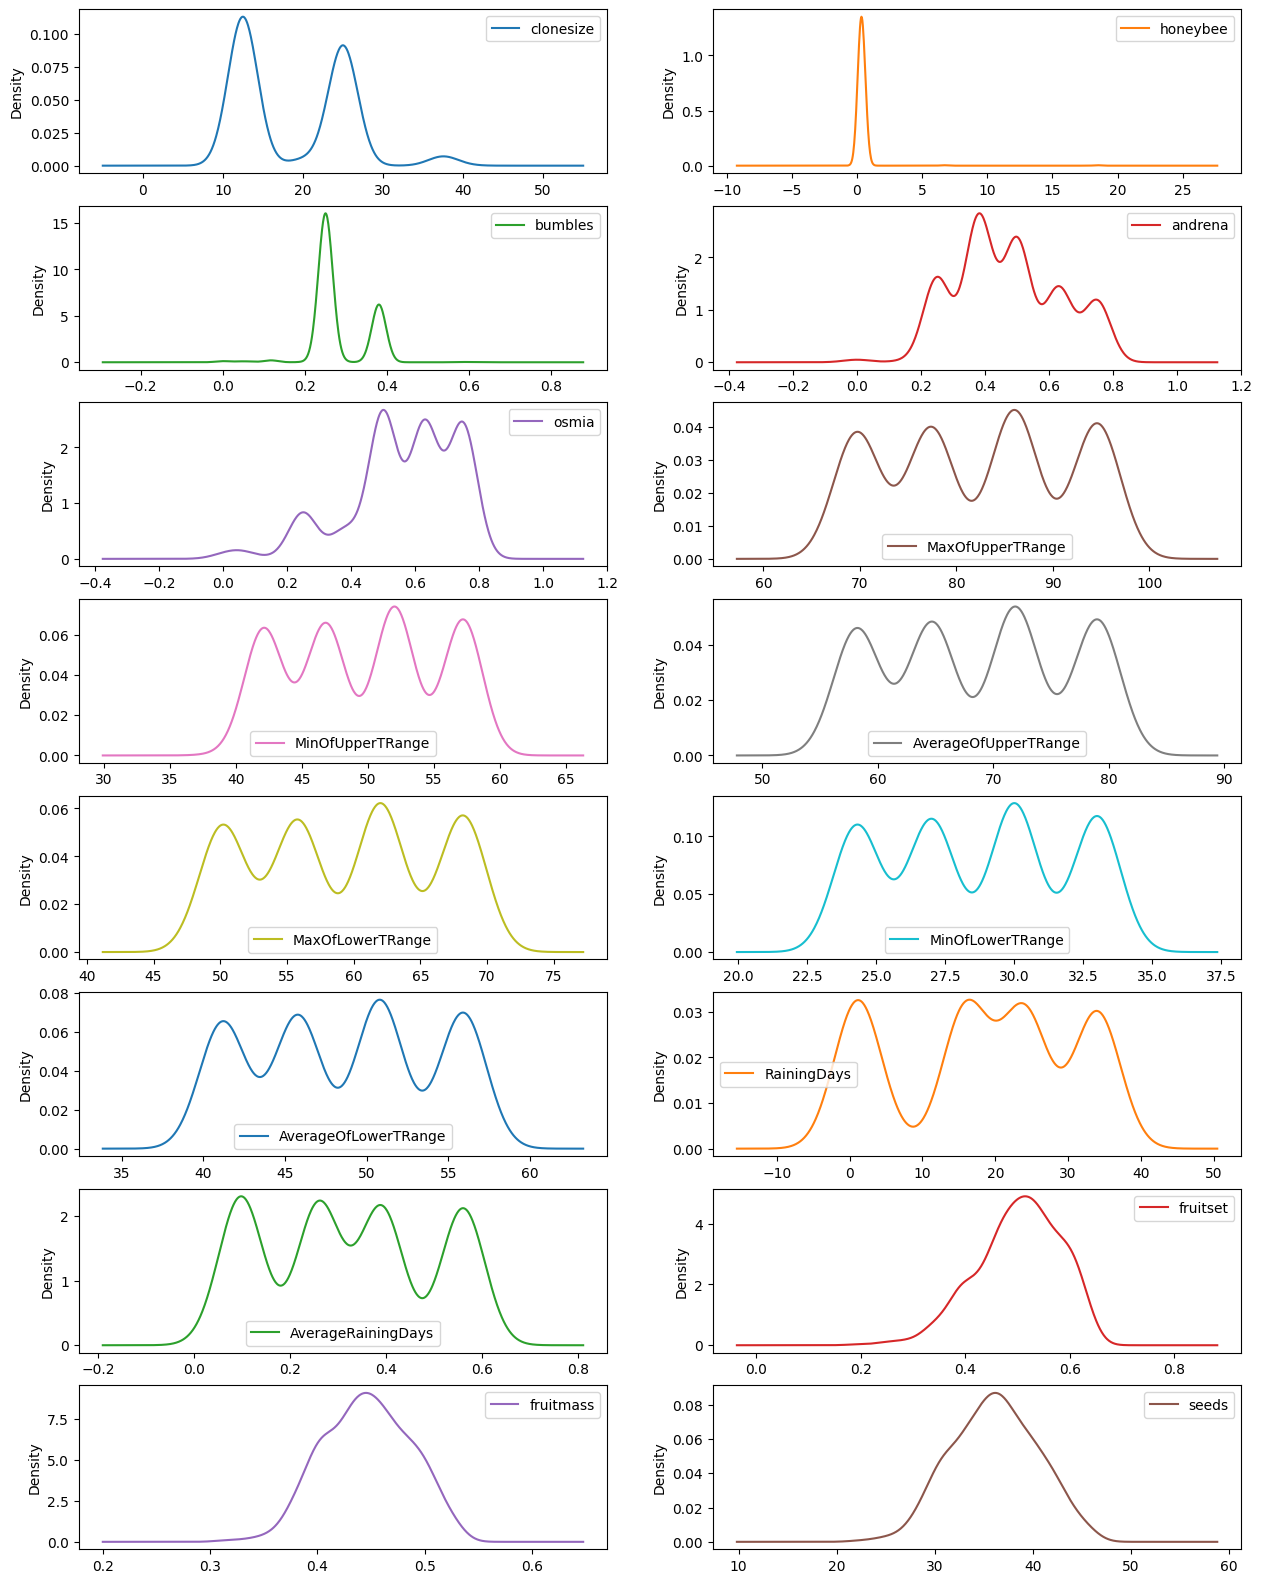

In [13]:
df.iloc[:,:-1].plot(kind="density", 
                    subplots=True, 
                    layout = (8,2), 
                    figsize=(15,20),sharex=False,sharey=False);

### Observations
    1.Majority of the columns have skewness closer to "ZERO".
    2.Normal Distribution of data in Fruitset,Fruitmass,Seeds columns. Other columns data is normal distributed with more than one peaks,that is Bimodal ,multimodal